In [11]:
import pandas as pd
import glob
import talib
import os
import matplotlib.pyplot as plt

In [12]:
# Path to all stock files
stock_files = glob.glob("../data/raw/stocks/*.csv")

stock_data = {}

for file in stock_files:
    symbol = os.path.splitext(os.path.basename(file))[0]  # get AAPL, MSFT, etc.
    df = pd.read_csv(file, parse_dates=["Date"], index_col="Date")
    stock_data[symbol] = df

print("Stocks loaded:", stock_data.keys())


Stocks loaded: dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA'])


In [13]:
for symbol, df in stock_data.items():
    df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
    df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
    df["RSI"] = talib.RSI(df["Close"], timeperiod=14)
    df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(df["Close"])
    stock_data[symbol] = df

# Example: check META indicators
stock_data["META"].tail()

,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,
2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800,332.302945,323.317843,67.333885,6.945367,4.729907,2.215461
2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600,333.303278,324.115724,68.187000,7.436800,5.271285,2.165514
2023-12-27,355.637543,356.800387,353.132994,353.888347,13207900,334.239505,324.844828,69.947874,7.974921,5.812012,2.162908
2023-12-28,356.124634,359.682686,355.617749,357.496184,11798800,335.537503,325.527023,70.237702,8.344500,6.318510,2.025990
2023-12-29,351.791290,357.794292,349.664418,356.790470,14987100,336.869788,326.262290,64.296803,8.193282,6.693464,1.499818


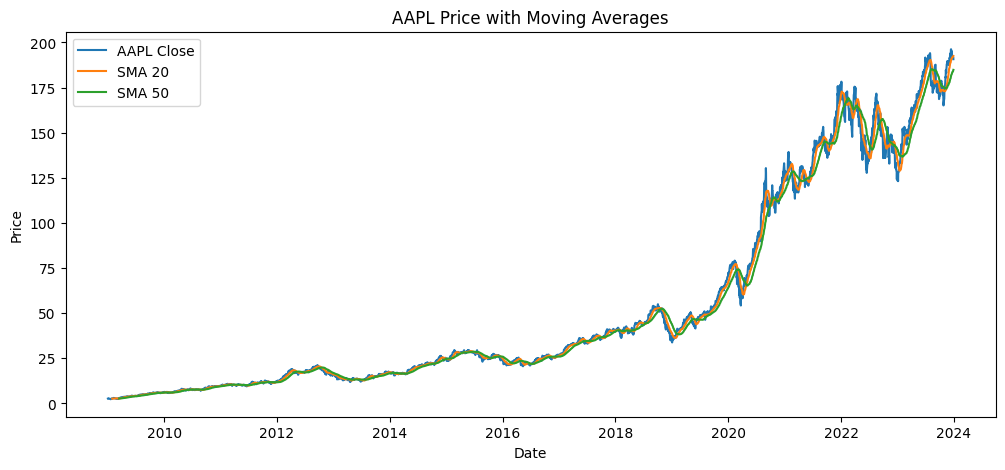

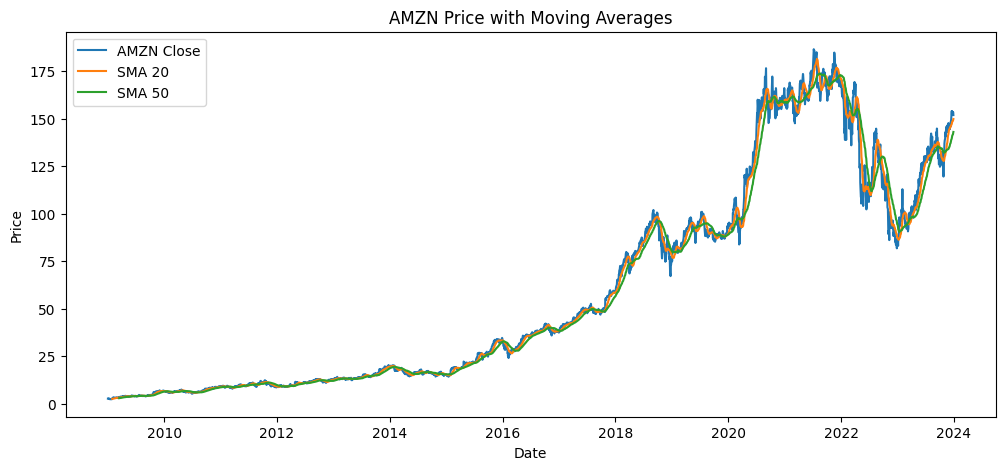

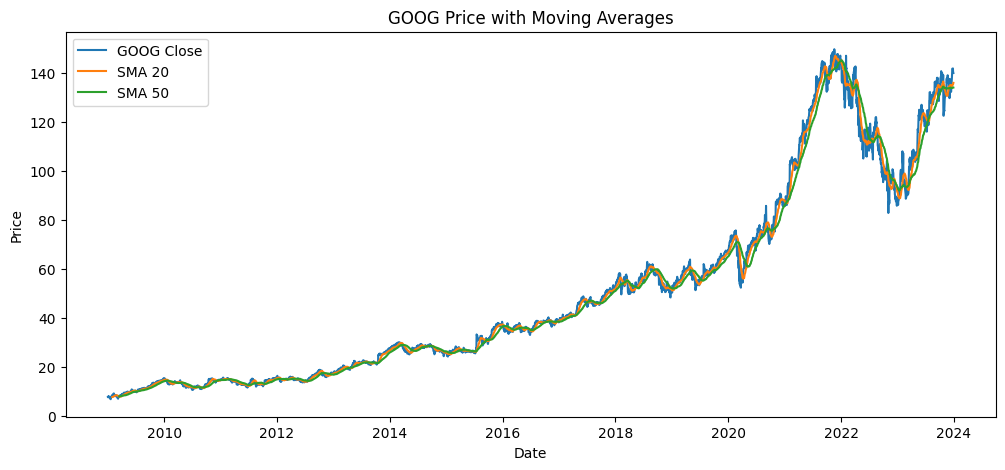

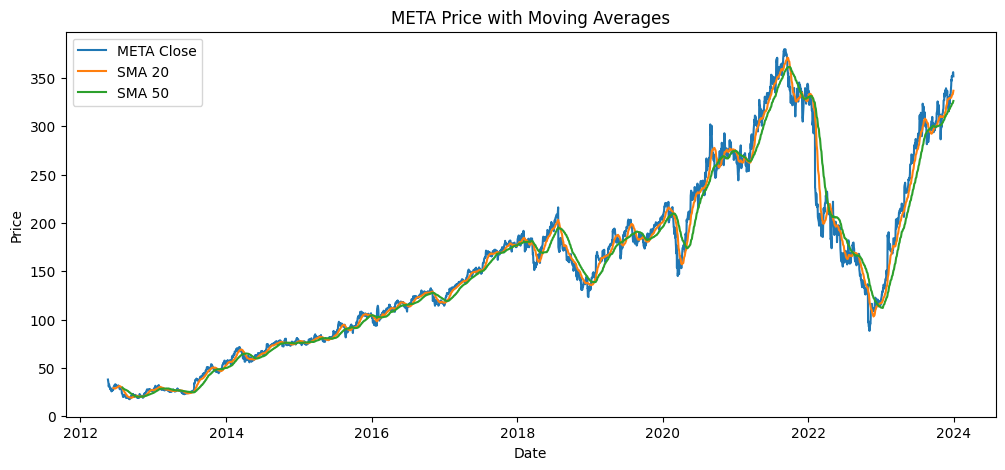

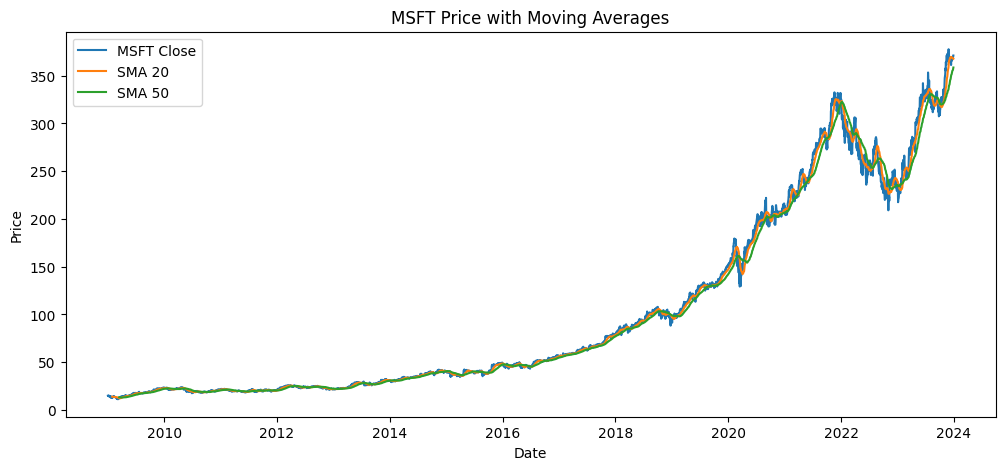

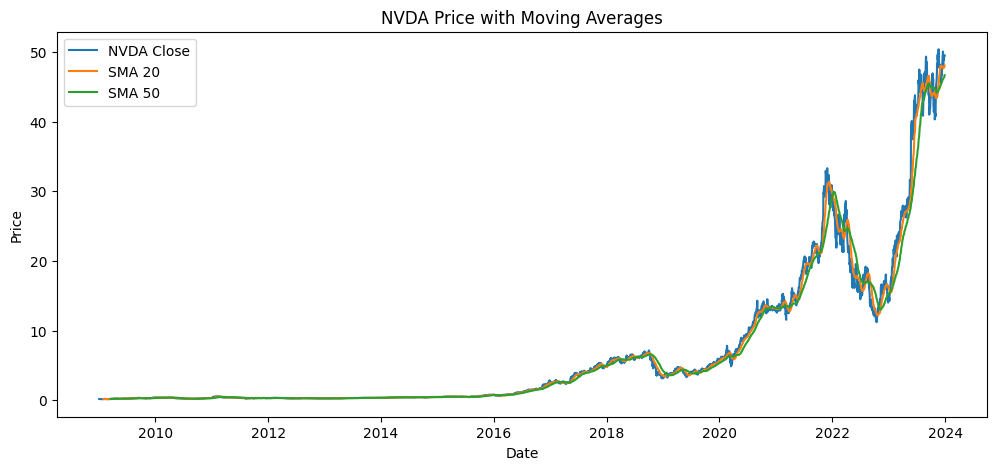

In [14]:
for symbol, df in stock_data.items():
    plt.figure(figsize=(12,5))
    plt.plot(df["Close"], label=f"{symbol} Close")
    plt.plot(df["SMA_20"], label="SMA 20")
    plt.plot(df["SMA_50"], label="SMA 50")
    plt.title(f"{symbol} Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

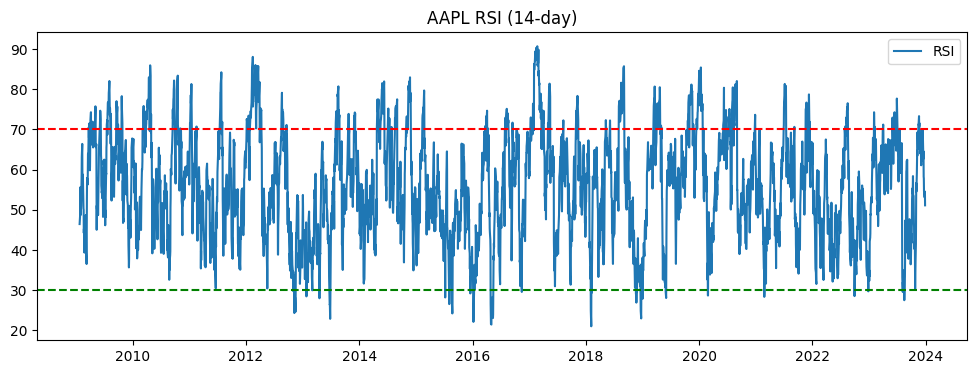

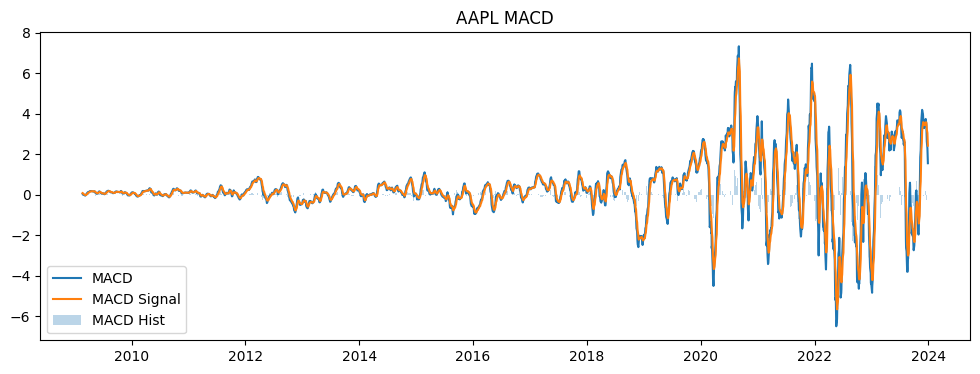

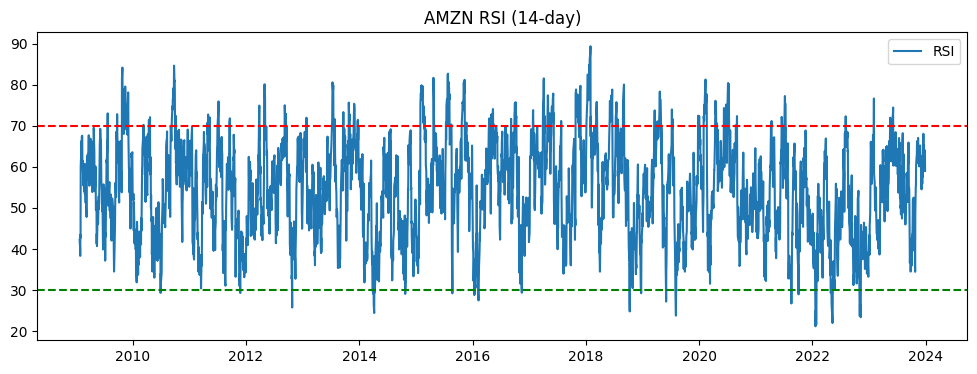

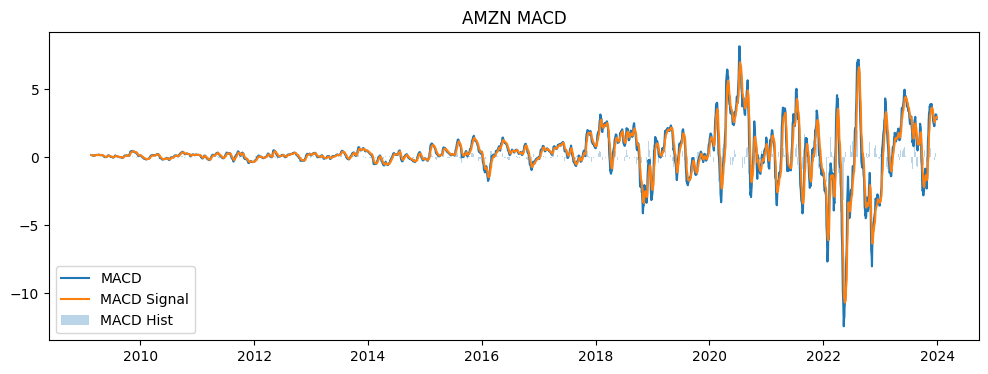

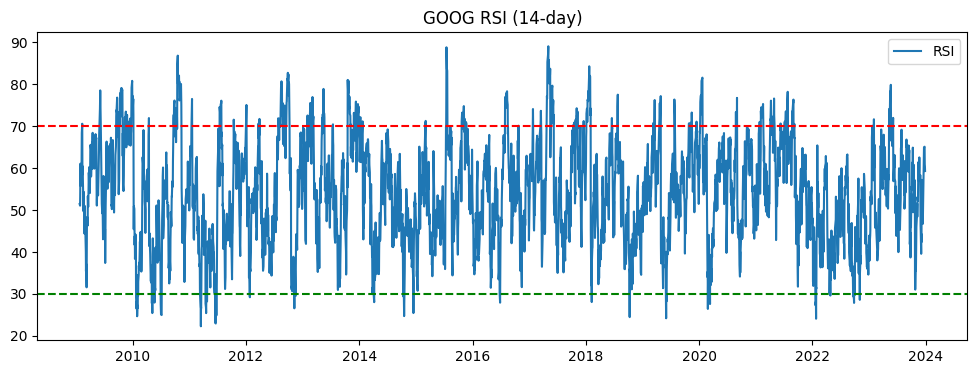

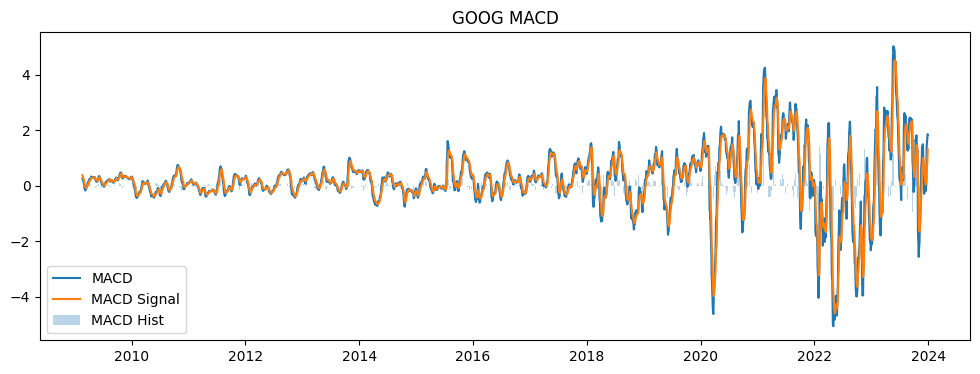

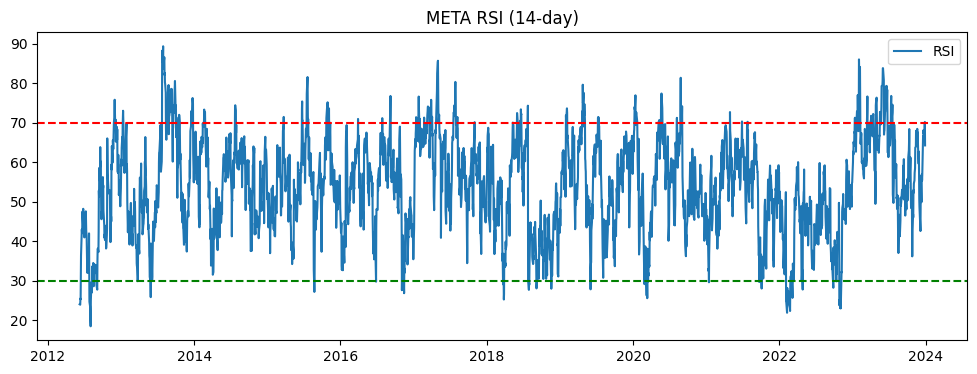

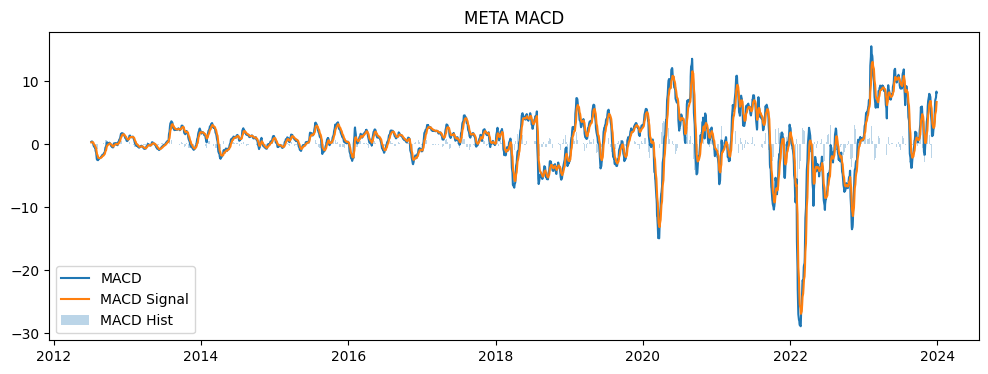

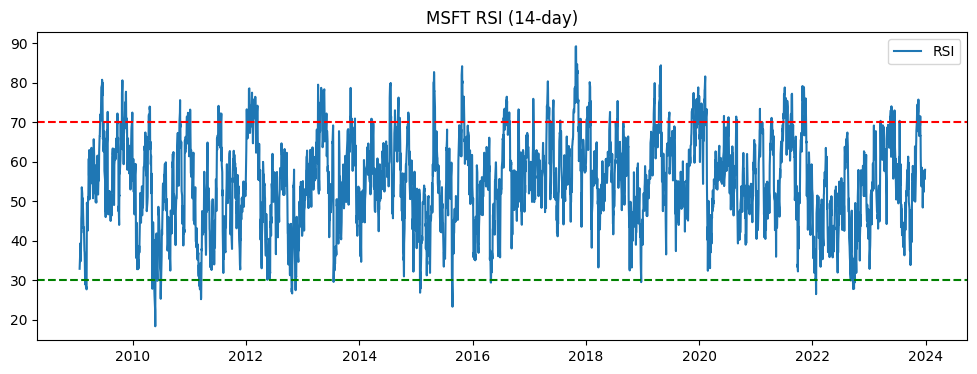

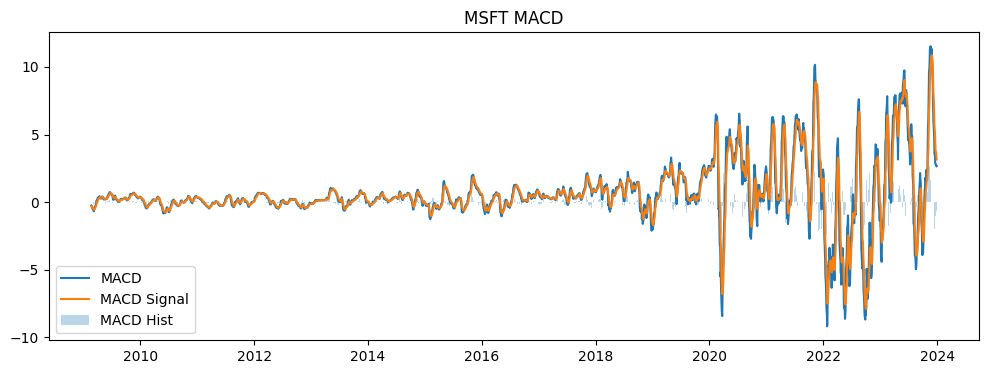

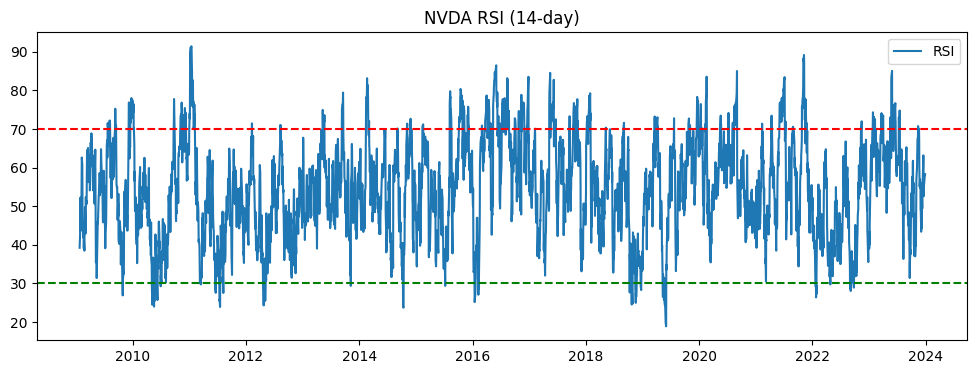

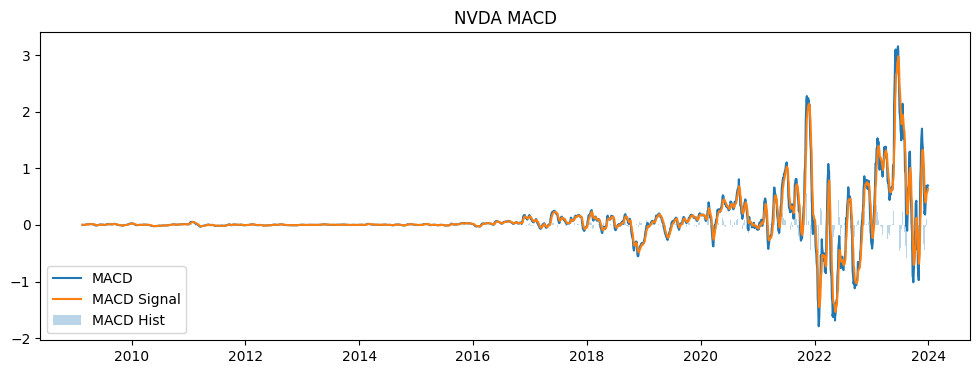

In [15]:
for symbol, df in stock_data.items():
    plt.figure(figsize=(12,4))
    plt.plot(df["RSI"], label="RSI")
    plt.title(f"{symbol} RSI (14-day)")
    plt.axhline(70, color="red", linestyle="--")
    plt.axhline(30, color="green", linestyle="--")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(df["MACD"], label="MACD")
    plt.plot(df["MACD_signal"], label="MACD Signal")
    plt.bar(df.index, df["MACD_hist"], label="MACD Hist", alpha=0.3)
    plt.title(f"{symbol} MACD")
    plt.legend()
    plt.show()
